<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU04_Optimización de vacunas</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>11.- ECA - Exploratory Causal Analysis</font>

<font color='steelblue'>Exploratory causal analysis (ECA) is the process of discovering the root causes of problems in order to identify appropriate solutions.</font>

## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Define the key challenge or setback</b>
    
<font color='steelblue'><b>Determine the causes and effects of the key challenge</b>
    
<font color='steelblue'><b>Use a diagram or graph to organize information</b>
    
<font color='steelblue'><b>Formulate a response to the primary causes of your challenge</b>
    
<font color='steelblue'><b>Review your process and address new causes and effects</b>



## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_04_08_20_vacunacion_gripe_train_and_test.csv</font>
- <font color='steelblue'> <b>No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [10]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

Warning message in Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8"):
“OS reports request to set locale to "es_ES.UTF-8" cannot be honored”


[1] ""

## <font color='green'>Settings</font>

### Libraries to use

In [11]:
library(readr)
library(dplyr)
library(tidyr)
library(stringr)

### Paths

In [12]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [13]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [14]:
iFile <- "CU_04_08_20_vacunacion_gripe_train_and_test.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_04_08_20_vacunacion_gripe_train_and_test.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [15]:
data <- read_csv(file_data)


Rows: 21736 Columns: 49
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): GEOCODIGO, DESBDT, nombre_zona
dbl (45): ano, semana, n_vacunas, n_citas, tmed, prec, velmedia, presMax, be...
lgl  (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<font color='tomato'>Visualizo los datos.</font>

Estructura de  los datos:

In [16]:
data |> glimpse()

Rows: 21,736
Columns: 49
$ GEOCODIGO         <chr> "259", "260", "041", "025", "046", "159", "065", "09…
$ DESBDT            <chr> "V Centenario", "Valdeacederas", "Canillejas", "Bara…
$ ano               <dbl> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2021, 2023…
$ semana            <dbl> 34, 8, 9, 49, 24, 3, 8, 47, 1, 2, 52, 39, 16, 50, 34…
$ n_vacunas         <dbl> 0, 0, 0, 292, 0, 524, 0, 248, 204, 205, NA, 0, 0, 51…
$ n_citas           <dbl> 0, 0, 0, 280, 0, 498, 0, 228, 198, 187, NA, 0, 0, 51…
$ tmed              <dbl> 27.278748, 9.577289, 8.536554, 9.065363, 29.905728, …
$ prec              <dbl> 0.169955881, 1.264910043, 3.122881160, 7.313886680, …
$ velmedia          <dbl> 2.297067, 1.890425, 2.418071, 1.562328, 2.564749, 1.…
$ presMax           <dbl> 940.0420, 944.1770, 949.7179, 941.8342, 940.5669, 95…
$ benzene           <dbl> 0.1764413, 0.4591543, 0.4099159, 0.4224172, 0.195865…
$ co                <dbl> 0.4987735, 0.3960647, 0.3951587, NA, 0.2891224, 0.50…
$ no           

Muestra de los primeros datos:

In [17]:
data |> slice_head(n = 5)

GEOCODIGO DESBDT        ano  semana n_vacunas n_citas tmed      prec      
1 259       V Centenario  2022 34       0         0     27.278748 0.16995588
2 260       Valdeacederas 2022  8       0         0      9.577289 1.26491004
3 041       Canillejas    2022  9       0         0      8.536554 3.12288116
4 025       Barajas       2022 49     292       280      9.065363 7.31388668
5 046       Castelló      2022 24       0         0     29.905728 0.01366852
  velmedia presMax  ⋯ t9_1      t10_1      t11_1     t12_1     area     
1 2.297067 940.0420 ⋯ 0.5151383 0.09258503 0.6406787 0.7028586 2100118.9
2 1.890425 944.1770 ⋯ 0.3863876 0.13151901 0.5451465 0.6277335 1164622.0
3 2.418071 949.7179 ⋯ 0.3129631 0.13926119 0.4600730 0.5346482 1597474.5
4 1.562328 941.8342 ⋯ 0.4611972 0.10460043 0.5920292 0.6590530 3816572.0
5 2.564749 940.5669 ⋯ 0.7018126 0.06114283 0.4717699 0.5025317  870986.8
  densidad_hab_km tuits_gripe interes_gripe Target is_train
1 15131.524        60         24            24     TRUE    
2 22498.286        56         15            15     TRUE    
3 17939.566        72         24            24     TRUE    
4  5893.247       196         77            77     TRUE    
5 17738.501        46         21            21     TRUE

##  Exploratory causal analysis

**REFERENCE**
https://bookdown.org/paul/applied-causal-analysis/

<font color='tomato'>Select columns</font>

In [20]:
# Seleccionamos las variables a analizar. 
cols <- c('GEOCODIGO','DESBDT','ano','semana','n_vacunas','n_citas','tmed','prec','velmedia','presMax','benzene','co','no','no2','nox','o3','pm10','pm2.5','so2','campana','scampana','capacidad_zona','prop_riesgo','tasa_riesgo','tasa_mayores','poblacion_mayores','nombre_zona','nsec','t3_1','t1_1','t2_1','t2_2','t4_1','t4_2','t4_3','t5_1','t6_1','t7_1','t8_1','t9_1','t10_1','t11_1','t12_1','area','densidad_hab_km','tuits_gripe','interes_gripe')

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 572 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 572 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 572 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 572 rows containing missing values (`geom_point()`).”


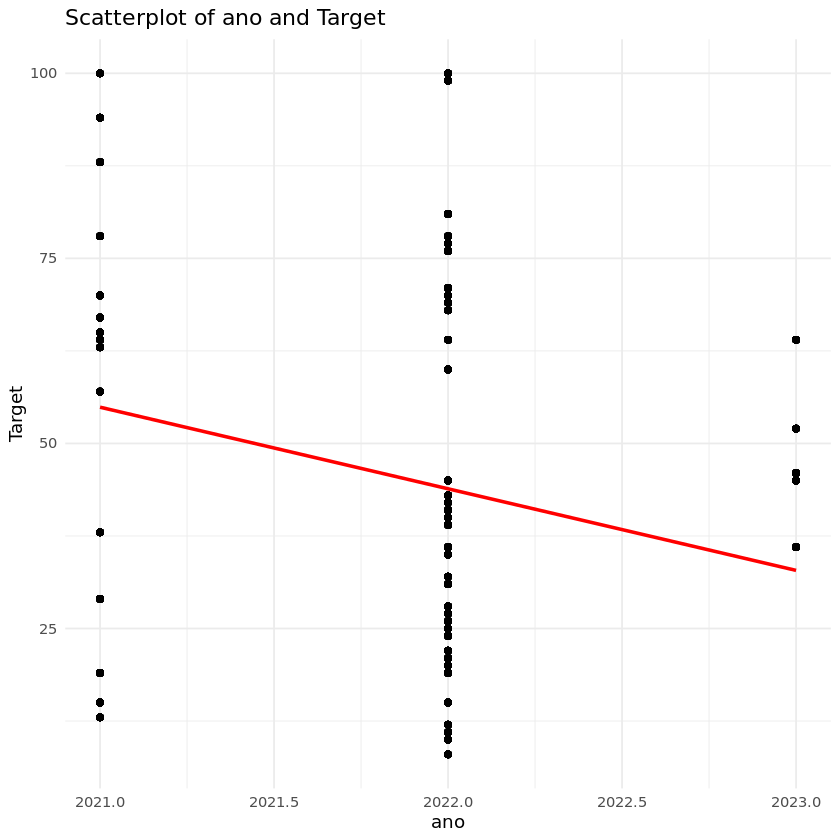

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


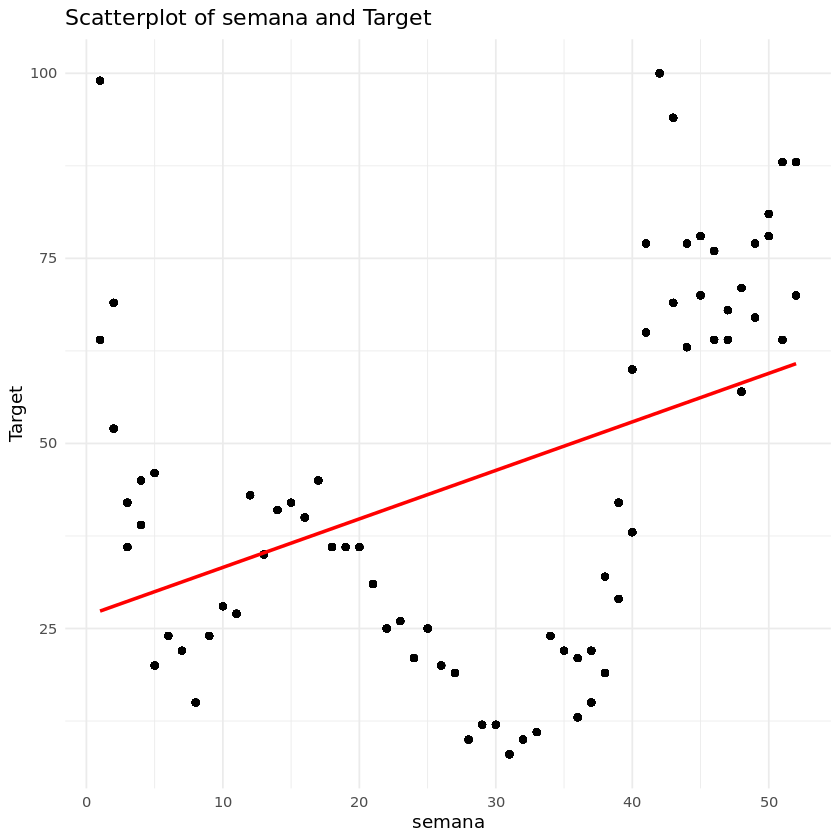

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


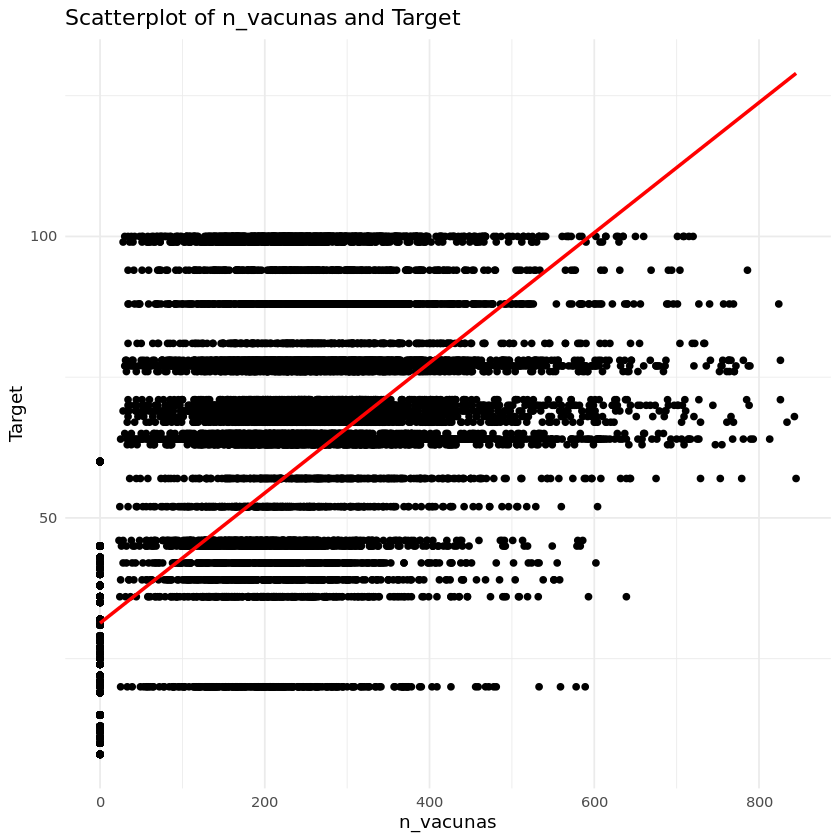

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 572 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 572 rows containing missing values (`geom_point()`).”


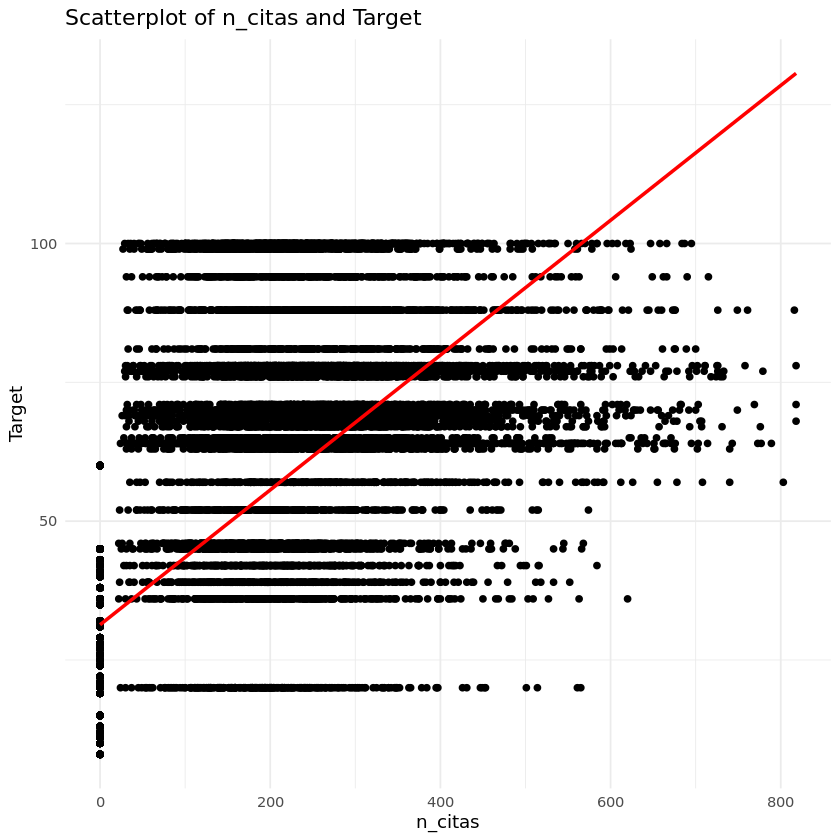

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 858 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 858 rows containing missing values (`geom_point()`).”


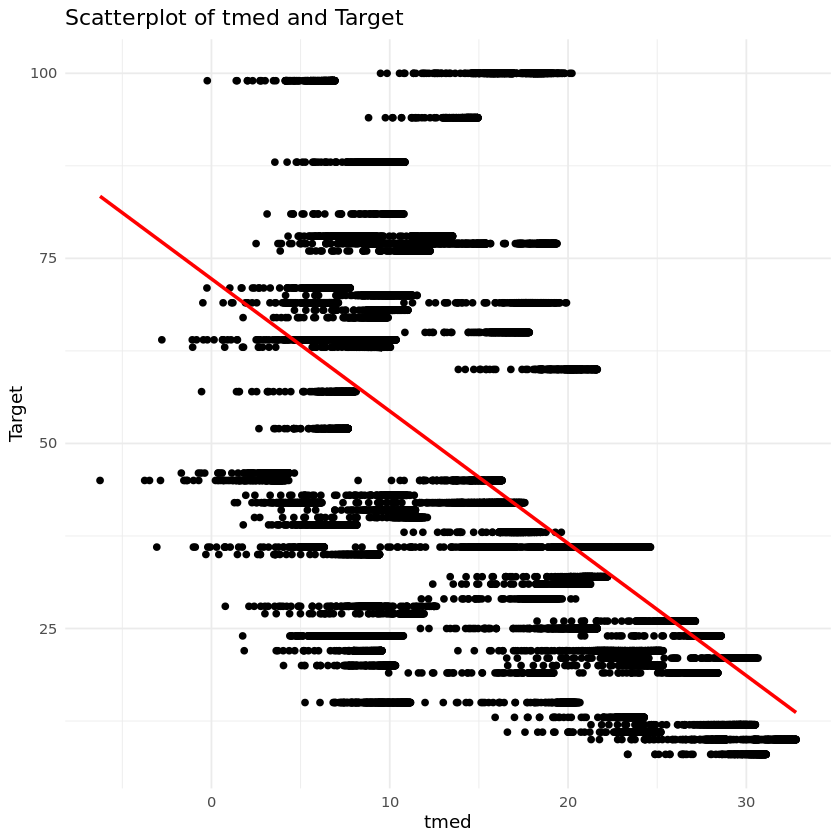

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 858 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 858 rows containing missing values (`geom_point()`).”


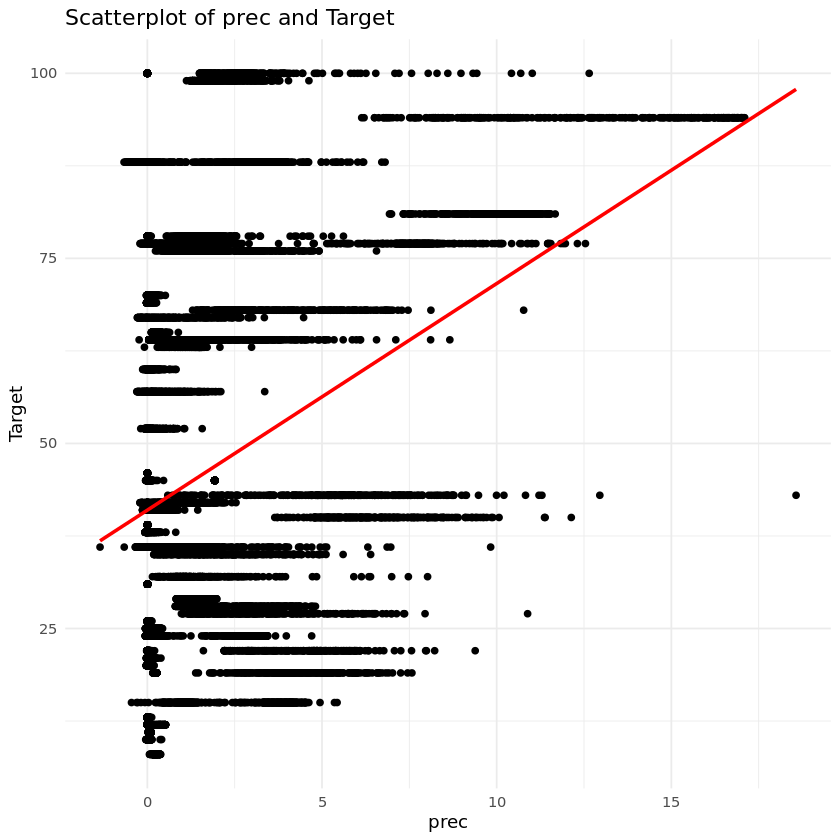

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 858 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 858 rows containing missing values (`geom_point()`).”


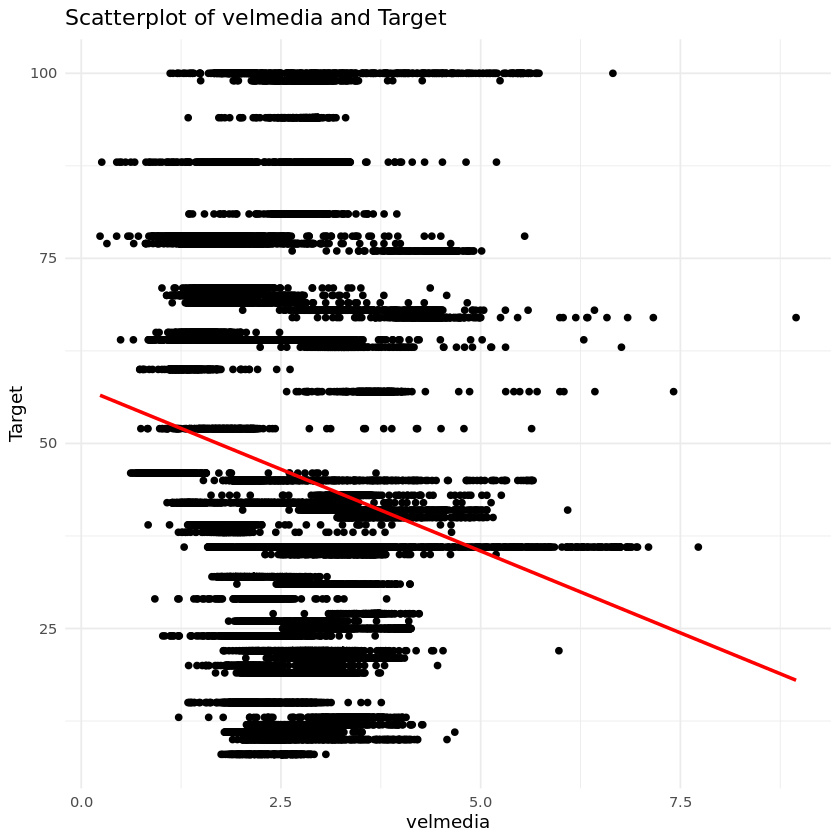

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1144 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1144 rows containing missing values (`geom_point()`).”


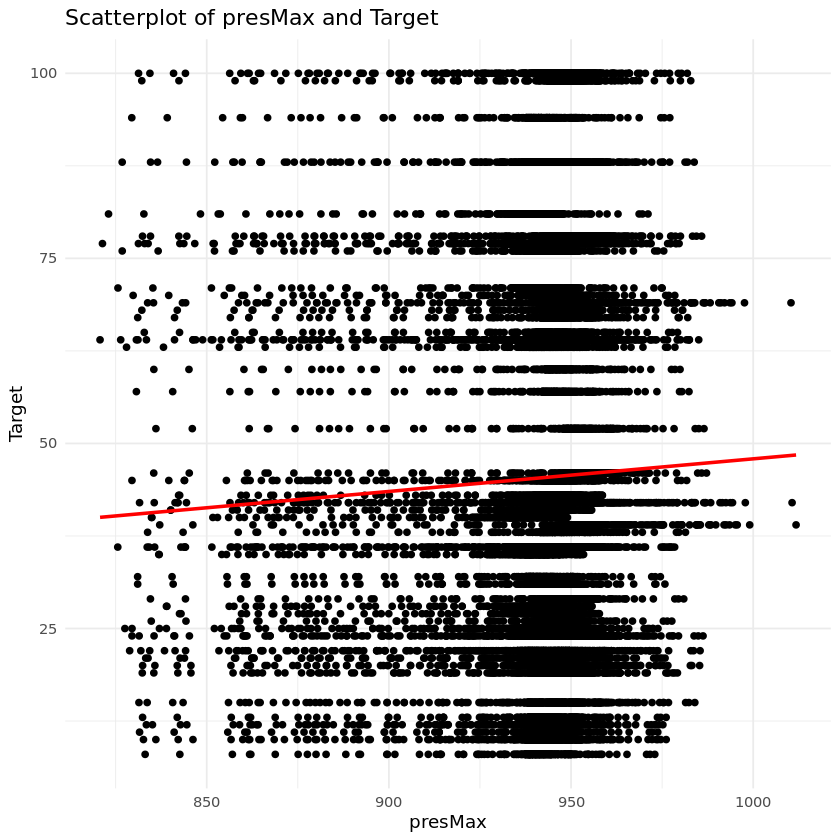

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2574 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2574 rows containing missing values (`geom_point()`).”


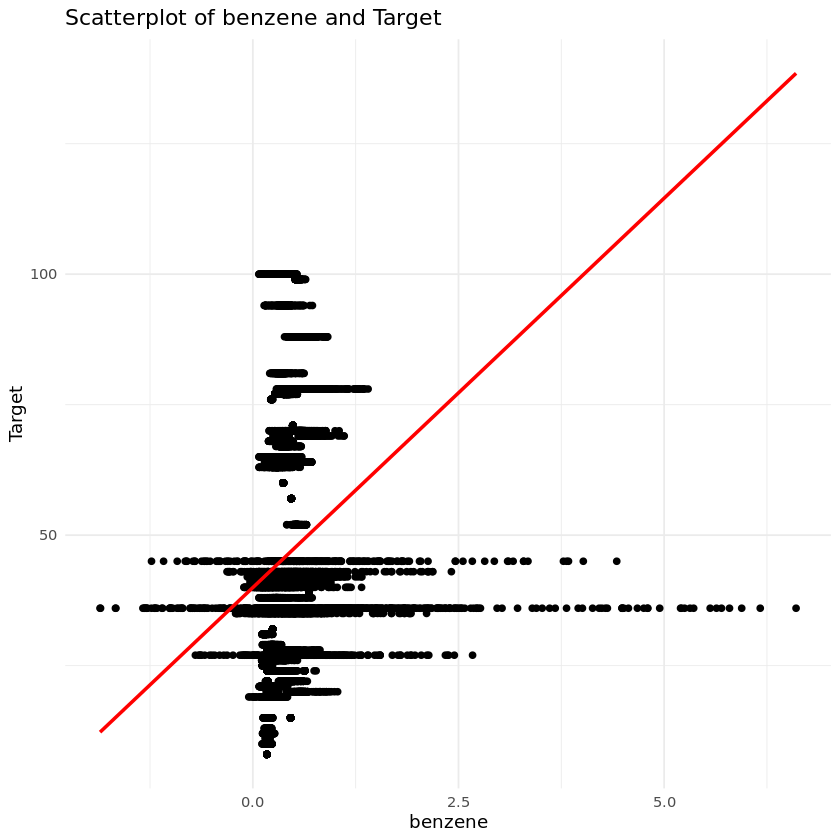

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1430 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1430 rows containing missing values (`geom_point()`).”


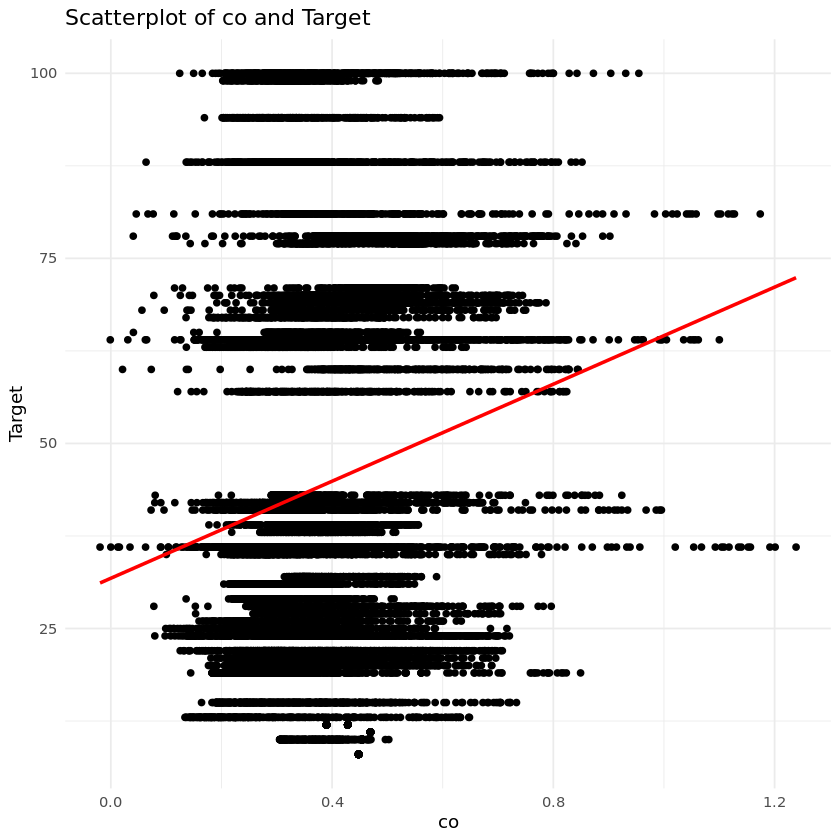

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1716 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1716 rows containing missing values (`geom_point()`).”


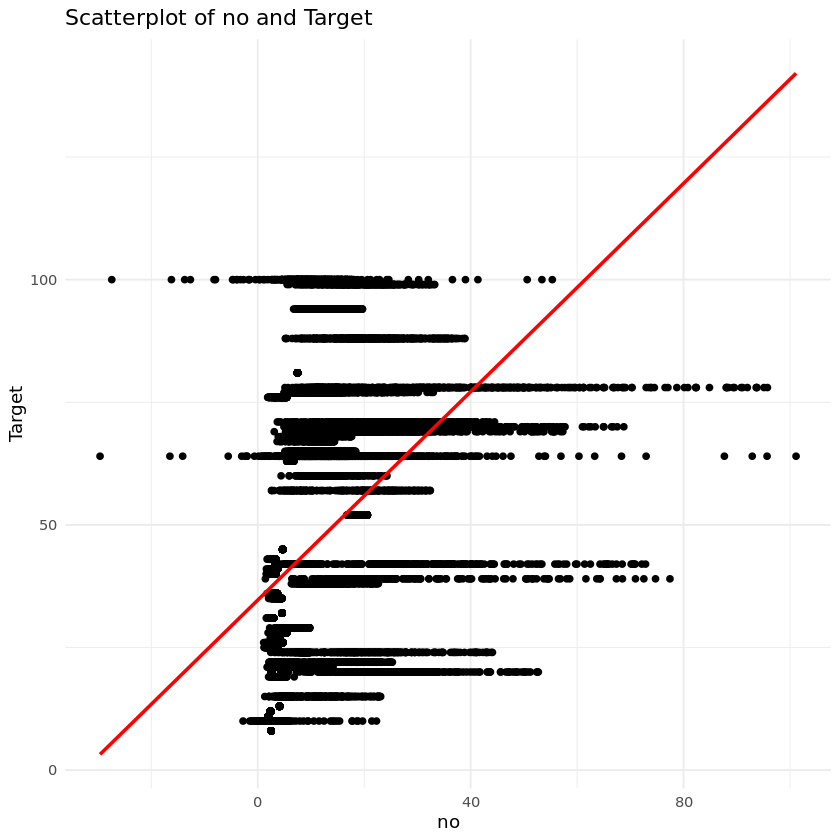

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1144 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1144 rows containing missing values (`geom_point()`).”


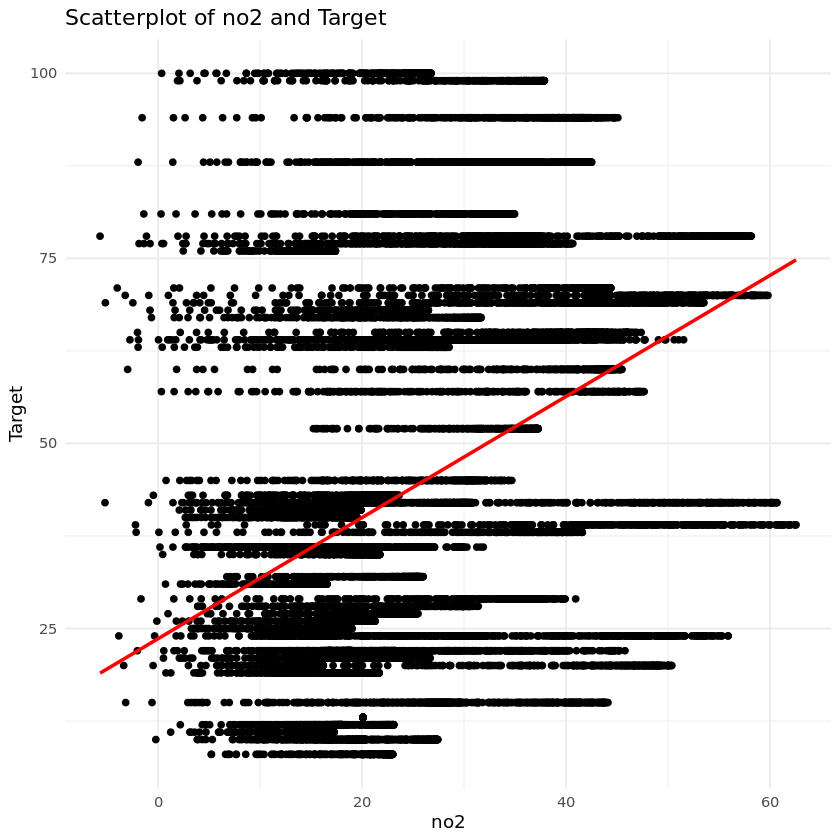

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1430 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1430 rows containing missing values (`geom_point()`).”


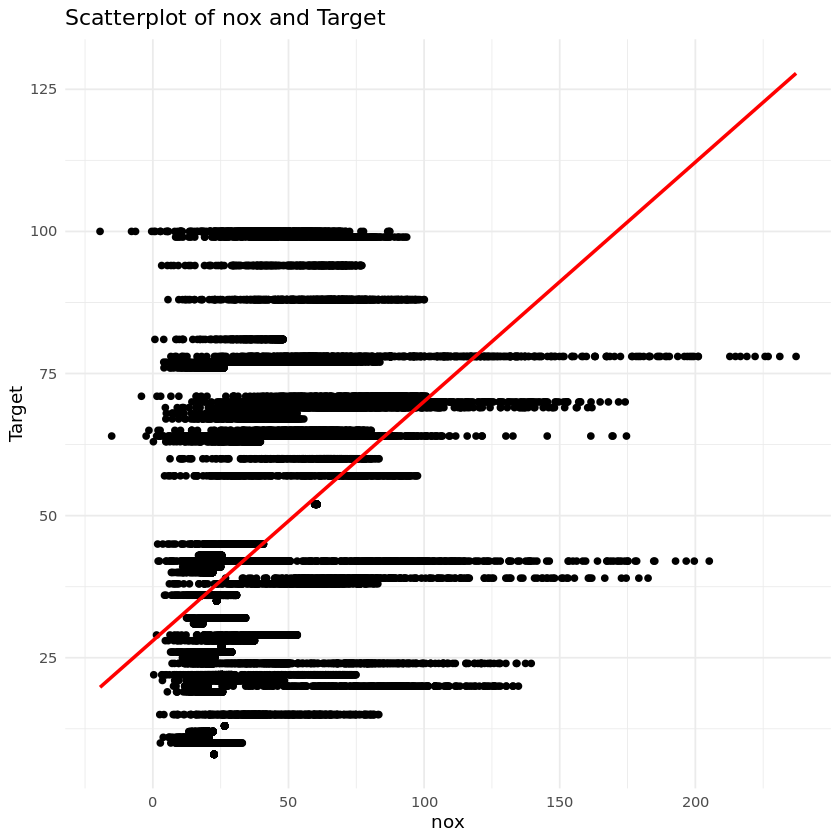

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1716 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1716 rows containing missing values (`geom_point()`).”


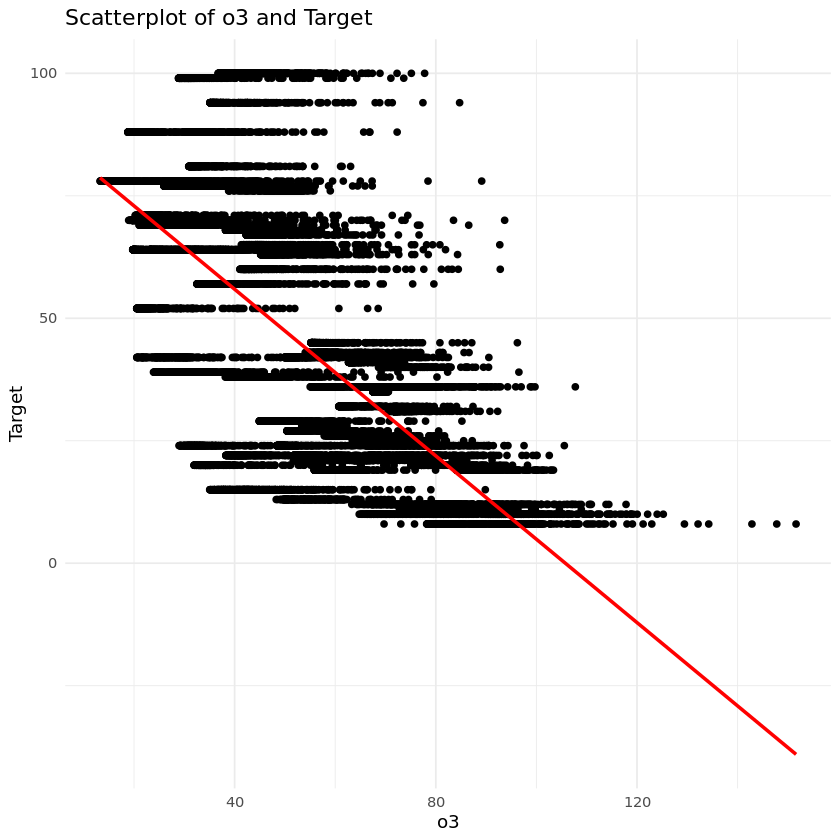

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1144 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1144 rows containing missing values (`geom_point()`).”


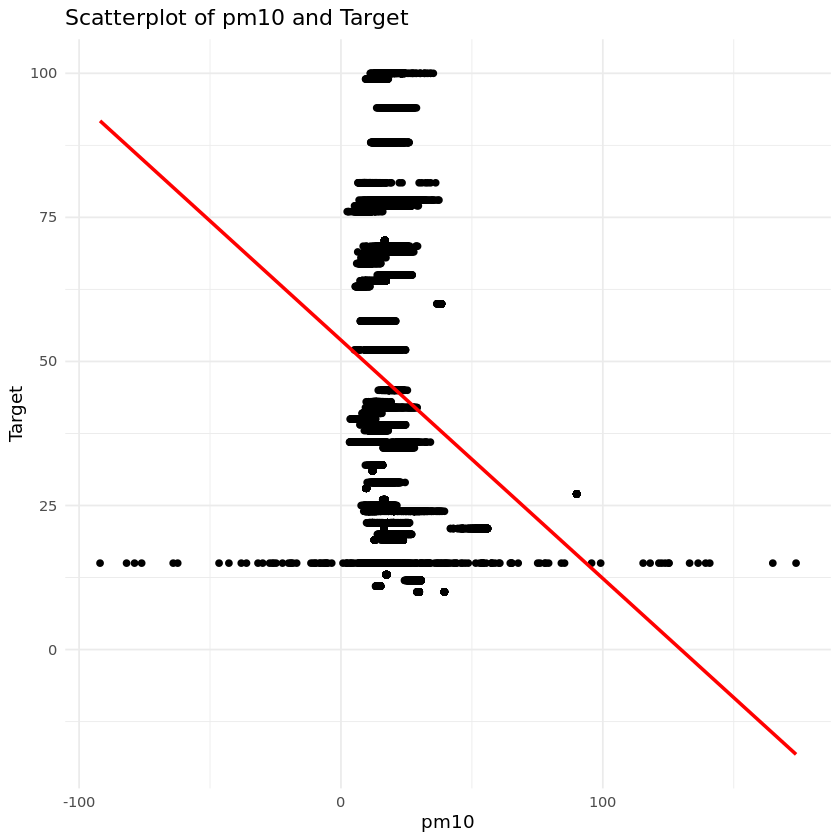

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1144 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1144 rows containing missing values (`geom_point()`).”


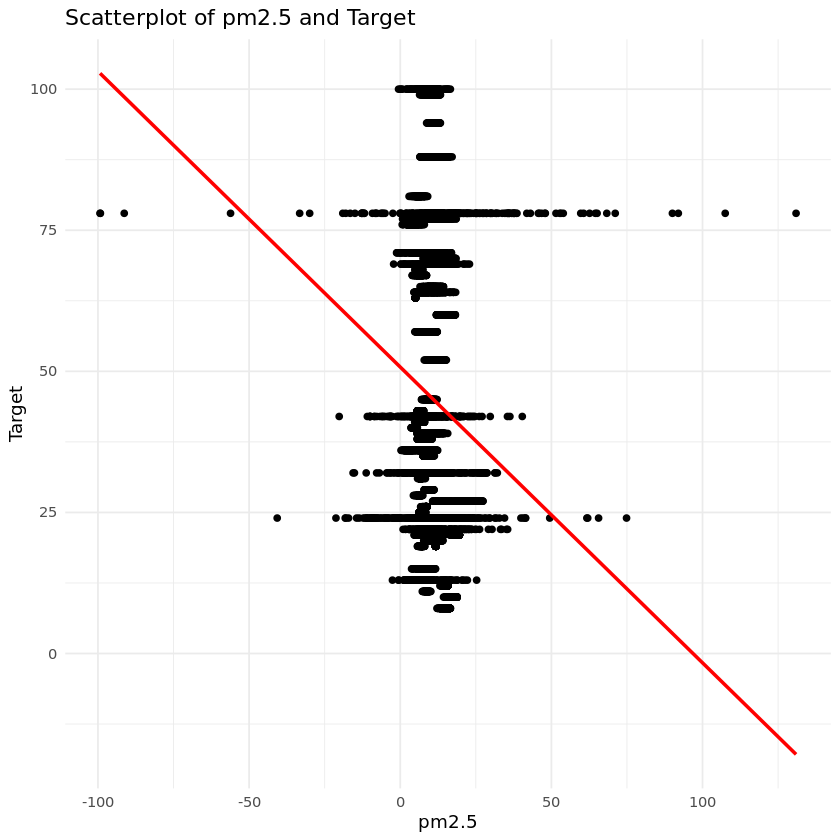

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 9152 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 9152 rows containing missing values (`geom_point()`).”


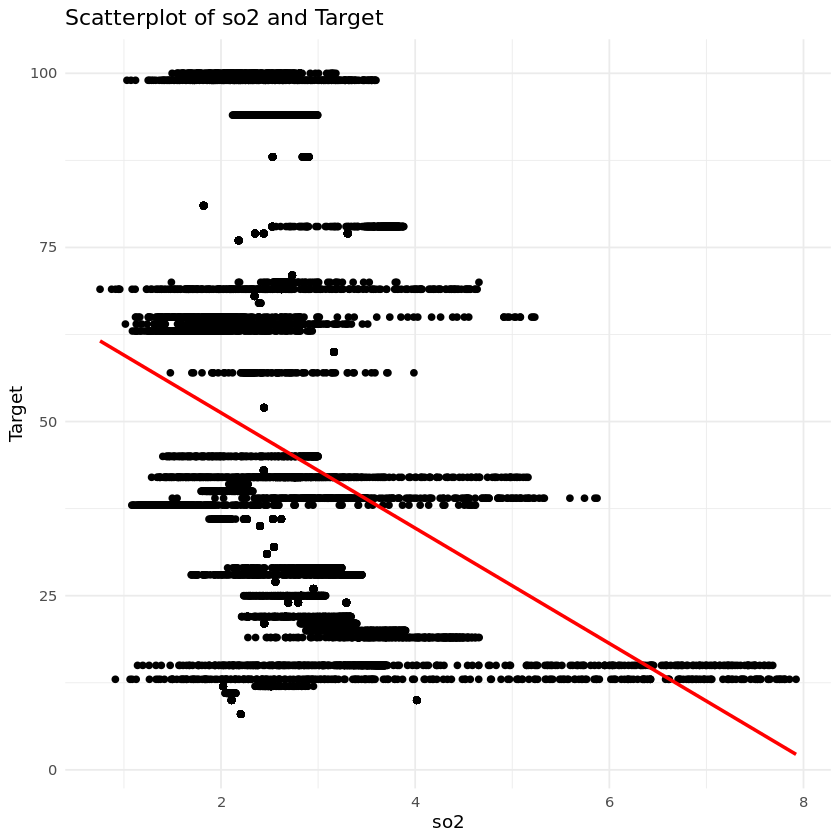

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 9152 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 9152 rows containing missing values (`geom_point()`).”


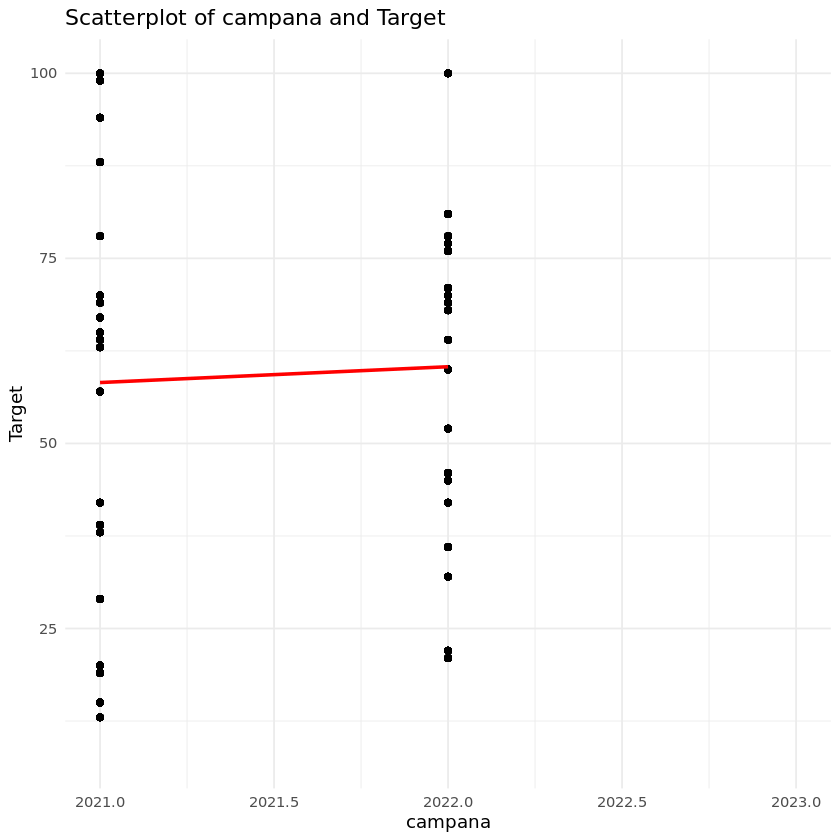

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


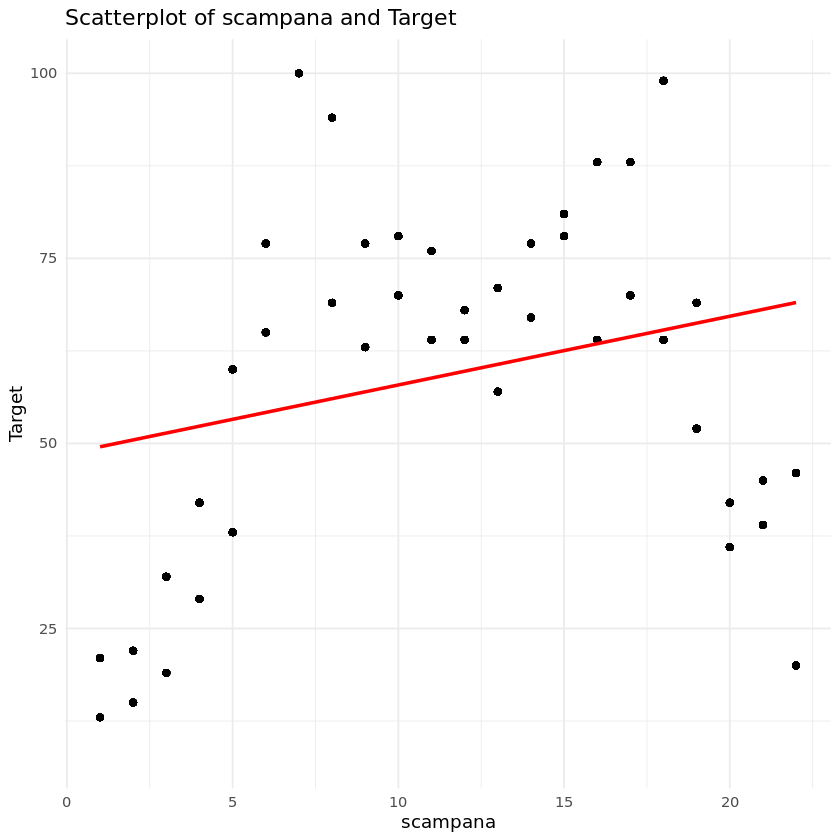

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


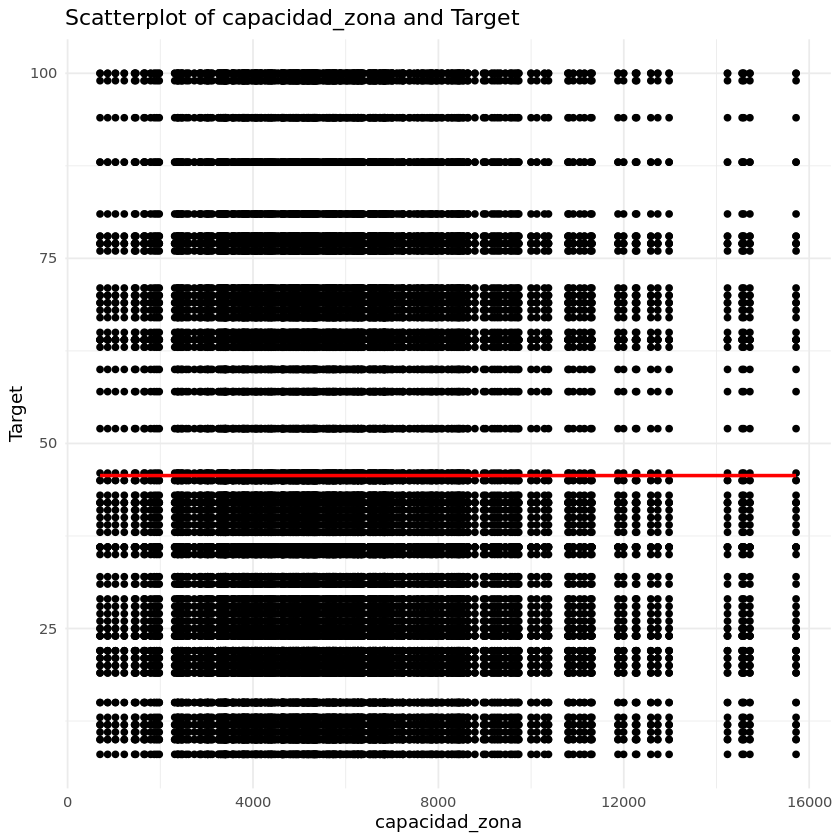

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


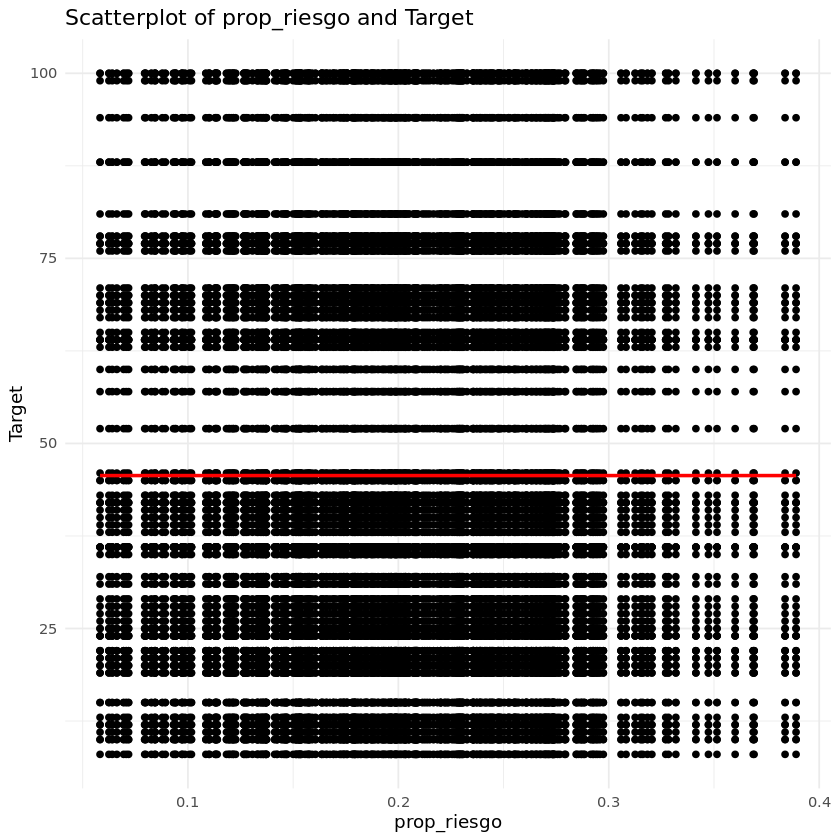

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


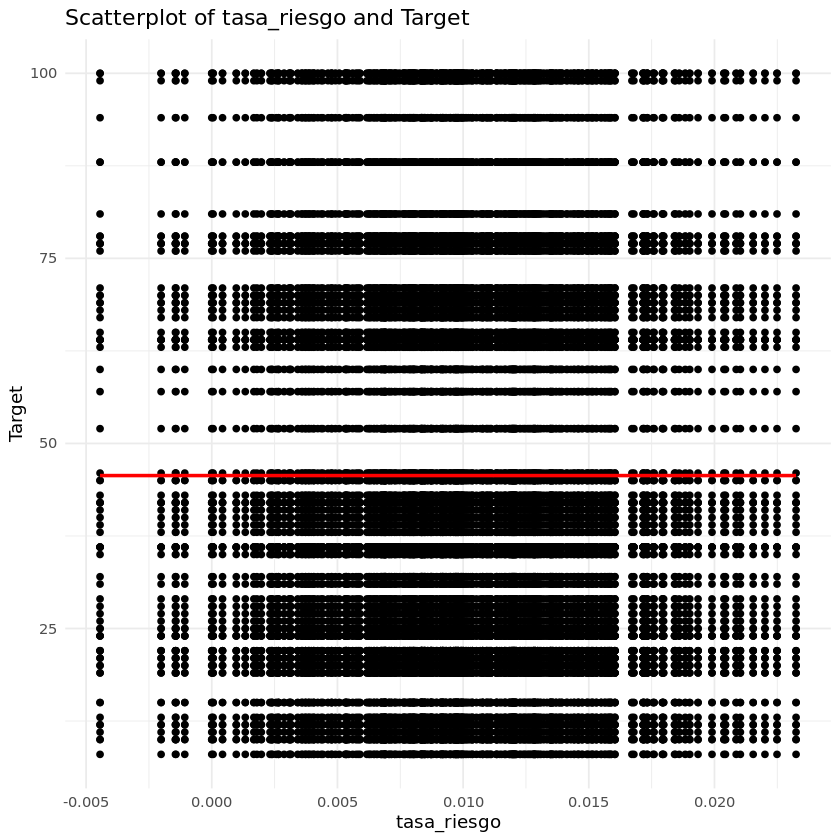

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


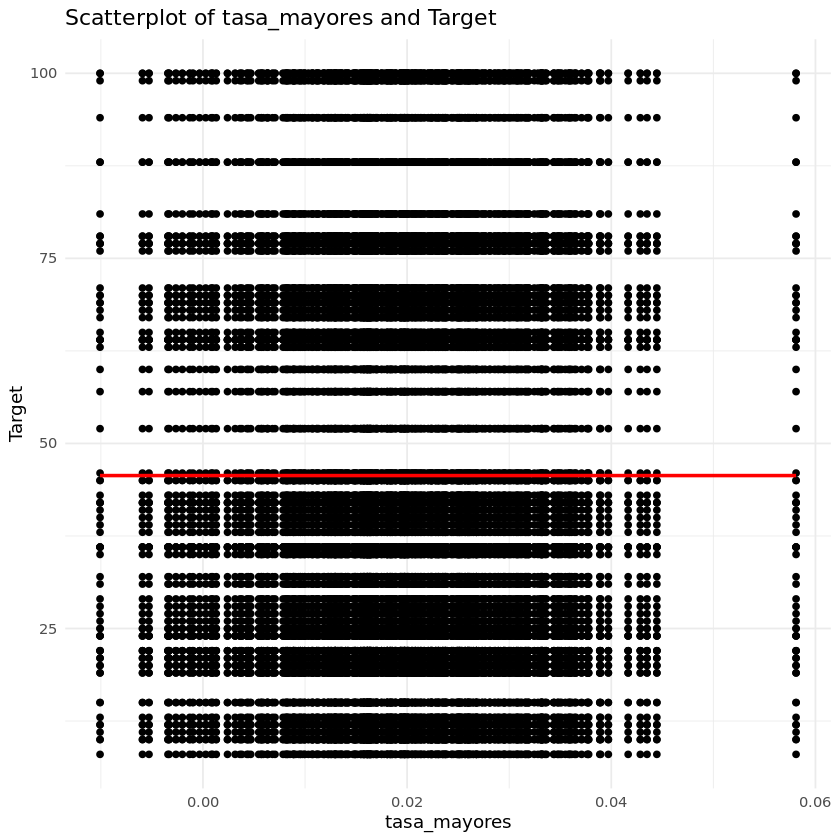

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 572 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 572 rows containing missing values (`geom_point()`).”


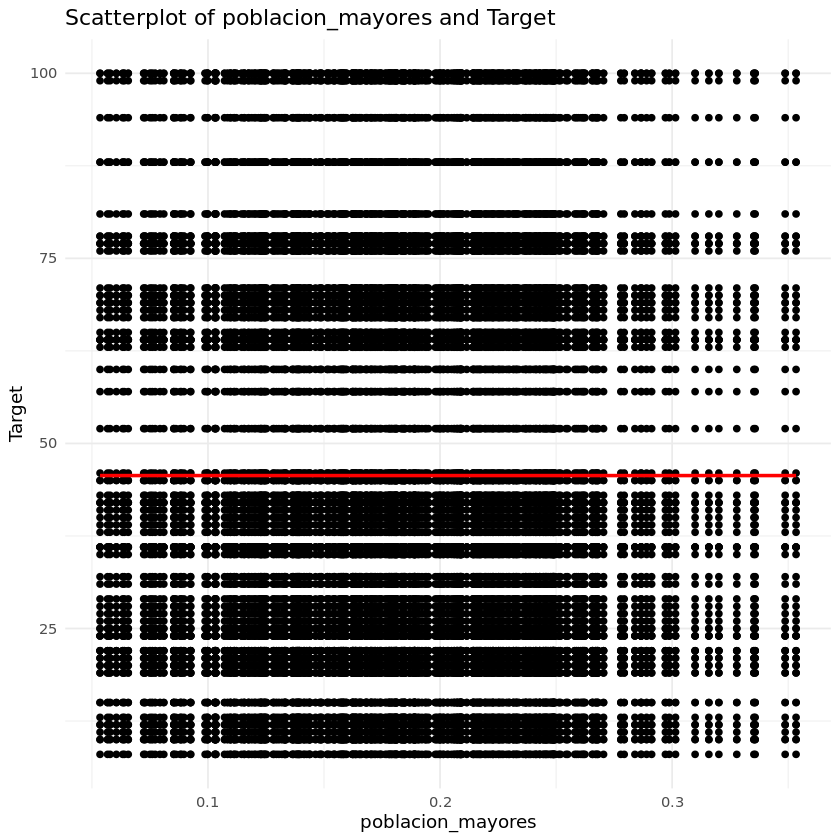

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


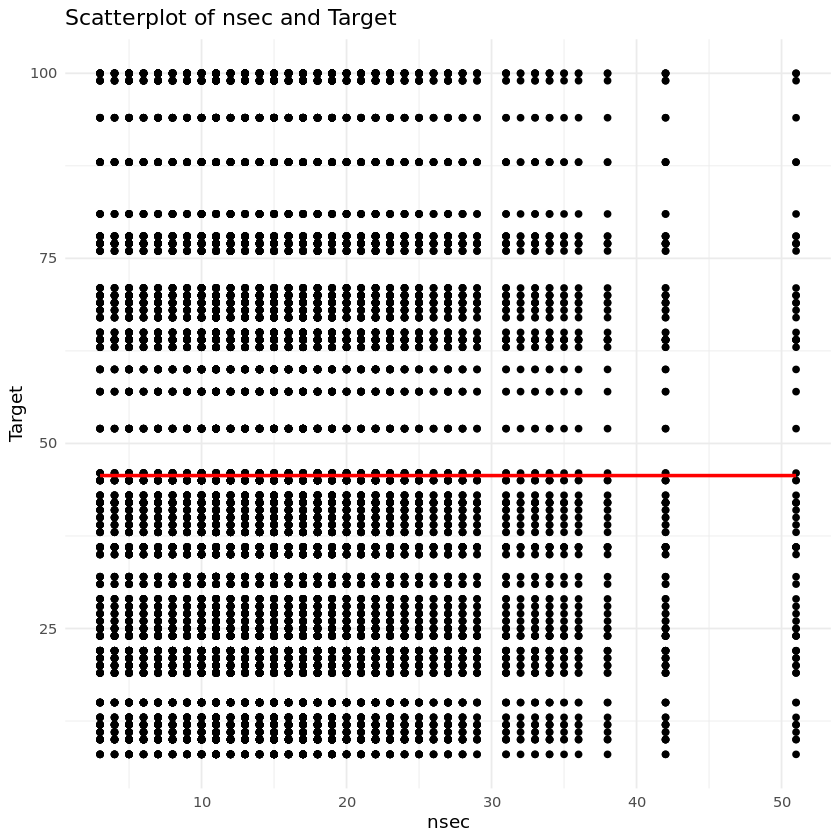

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


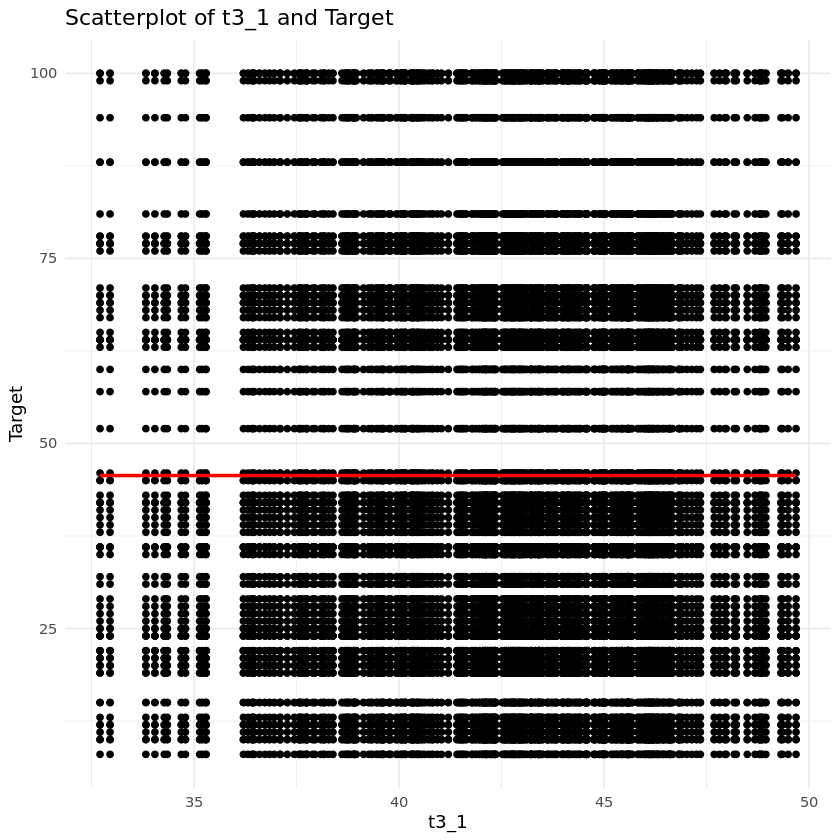

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


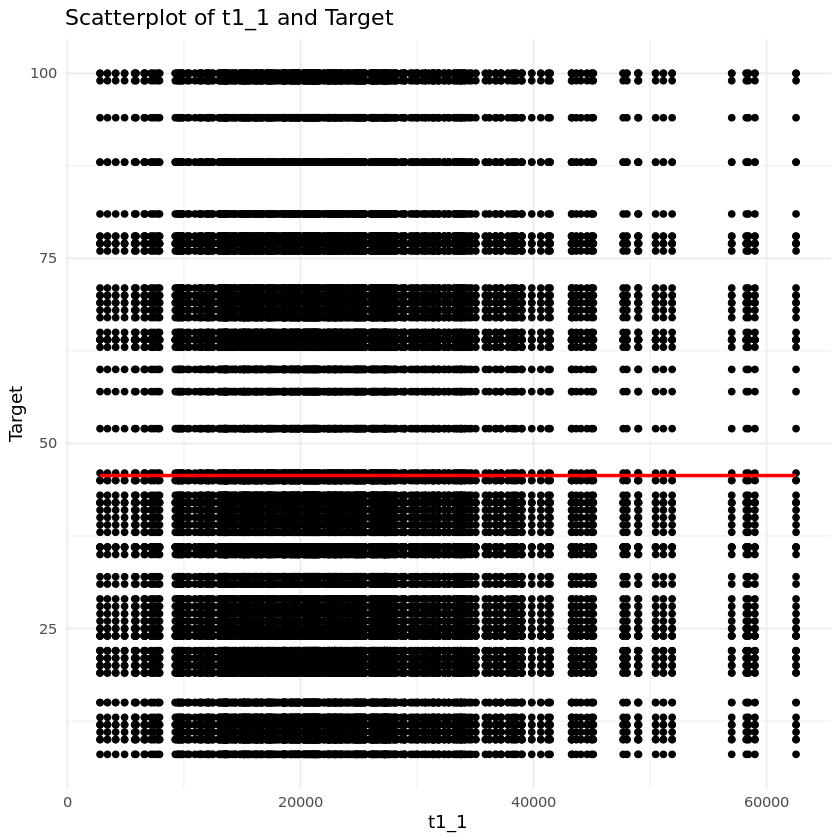

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


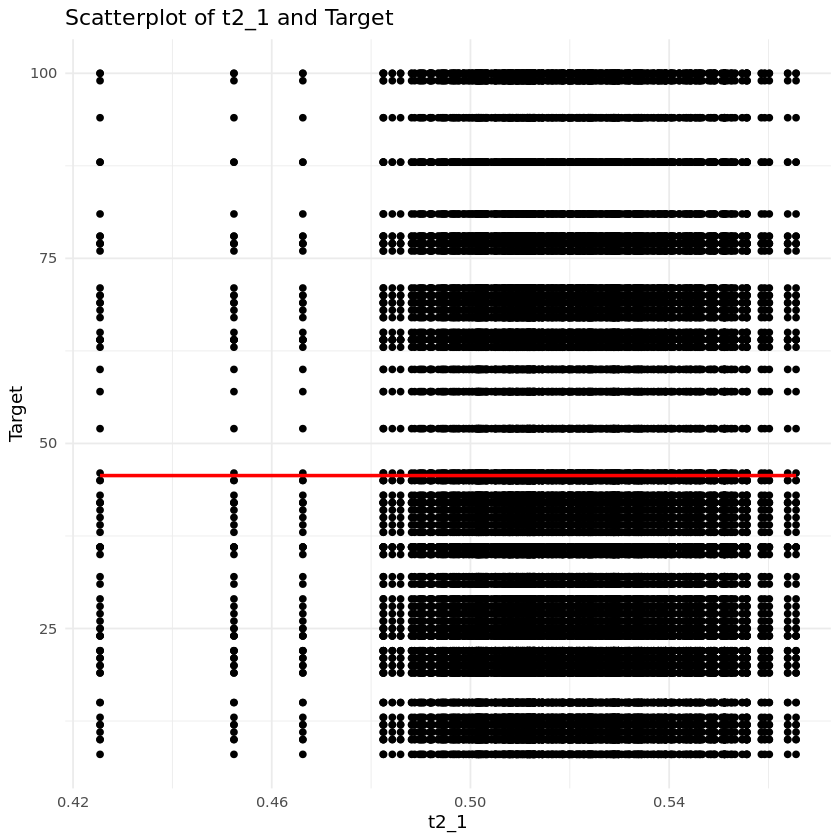

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


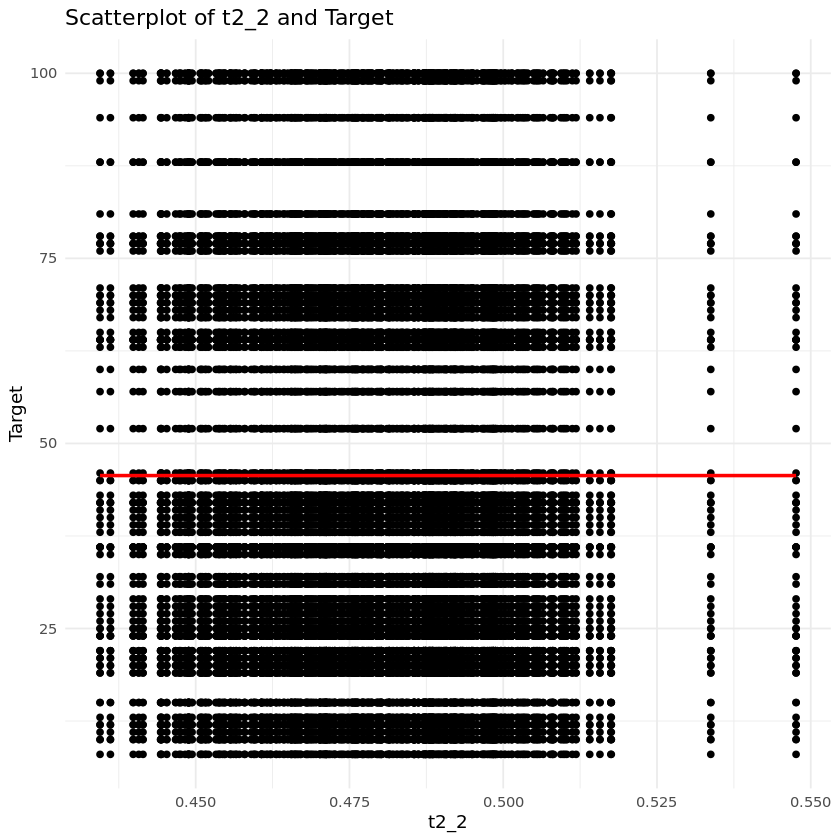

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


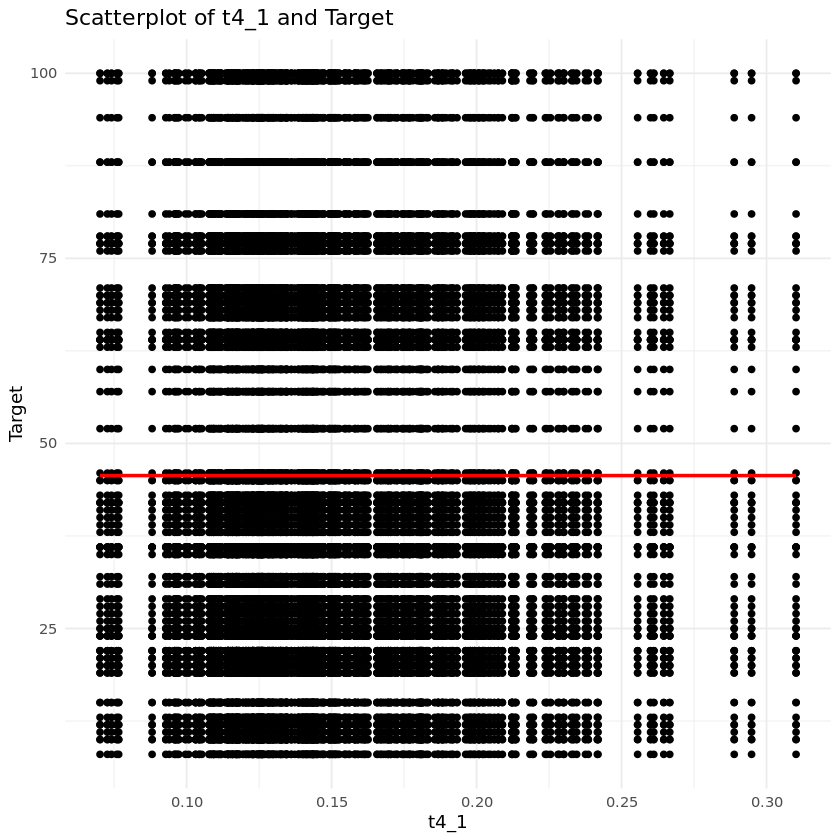

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


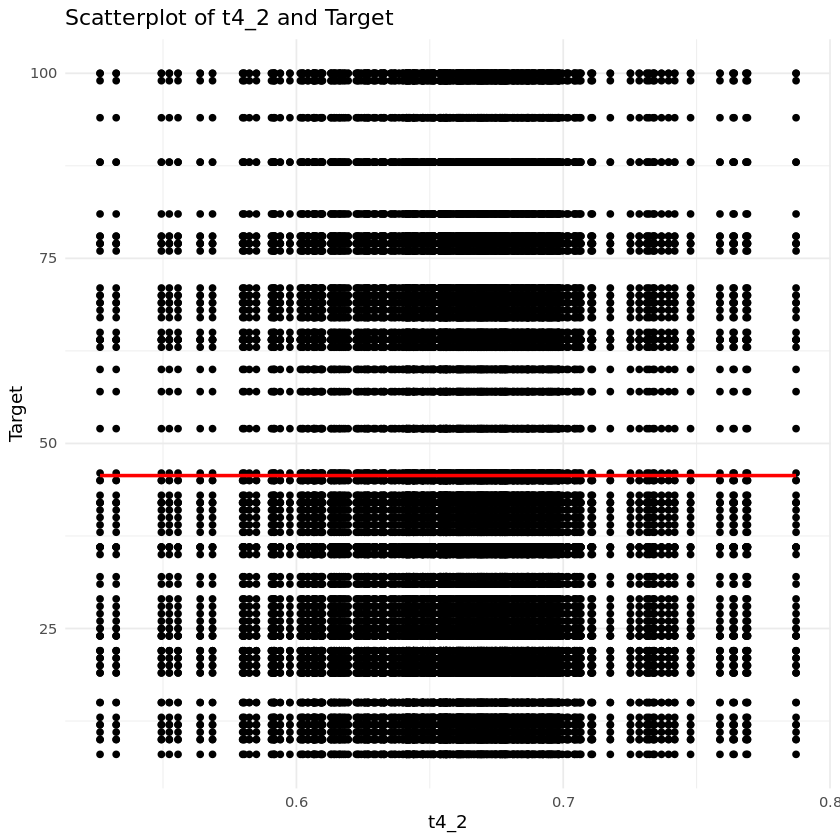

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


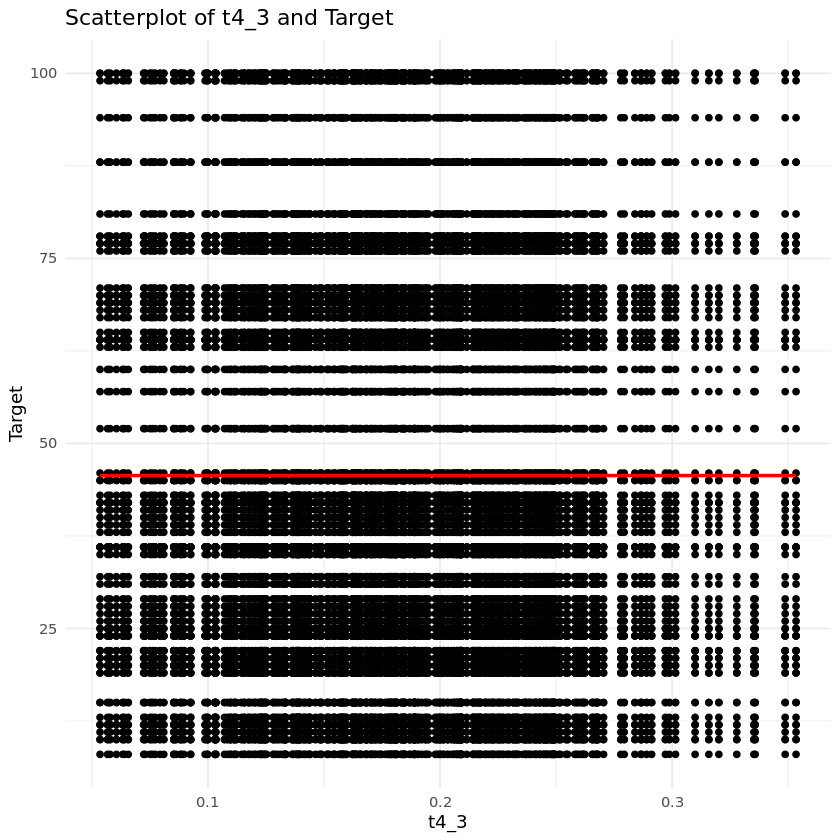

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


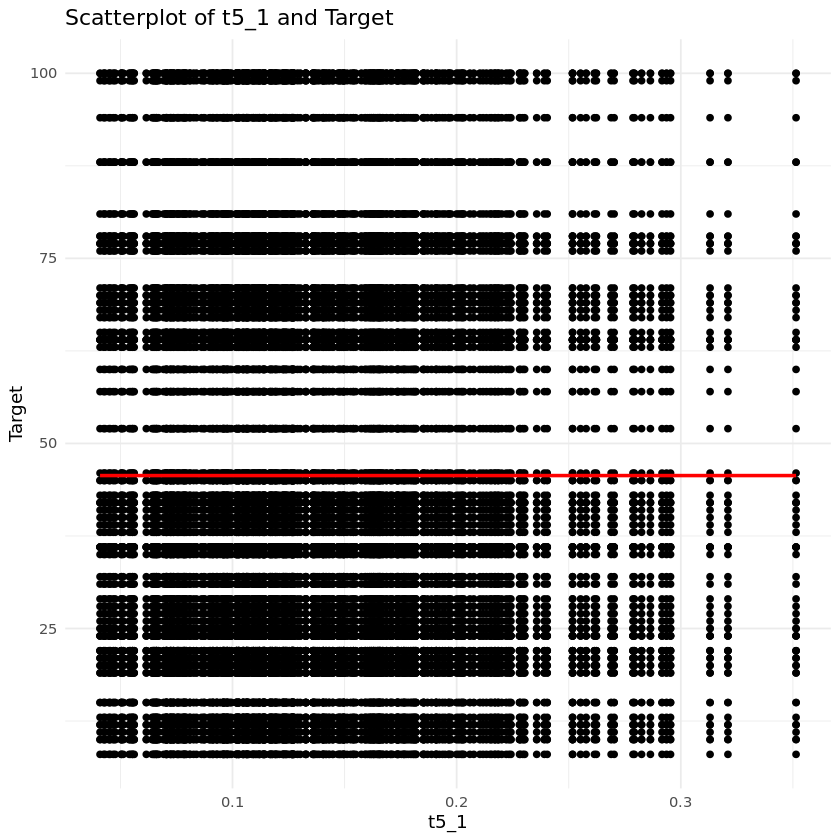

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


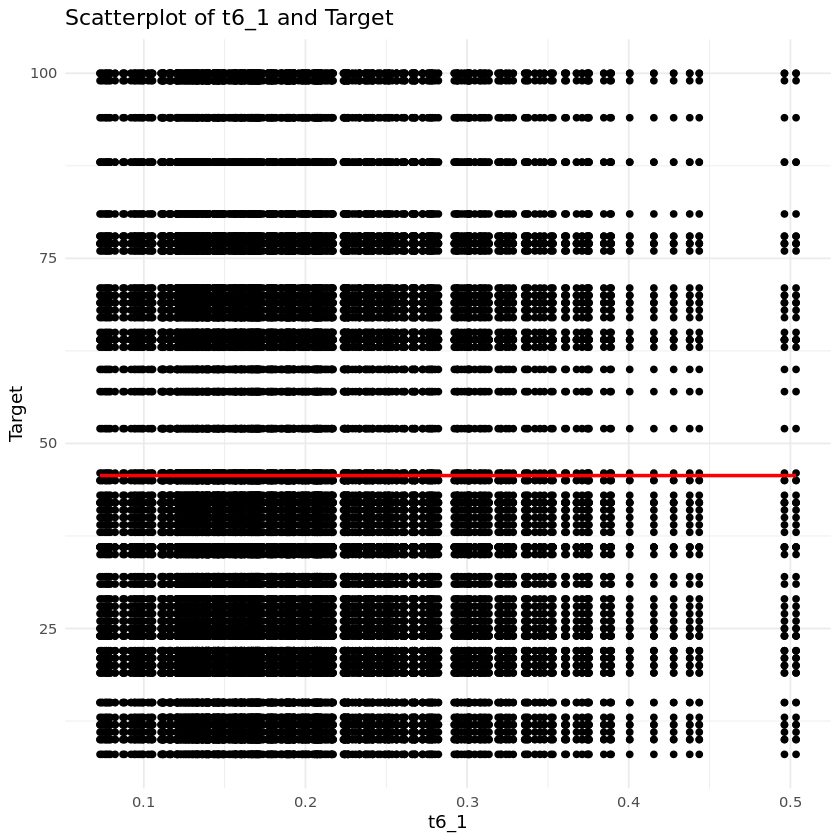

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


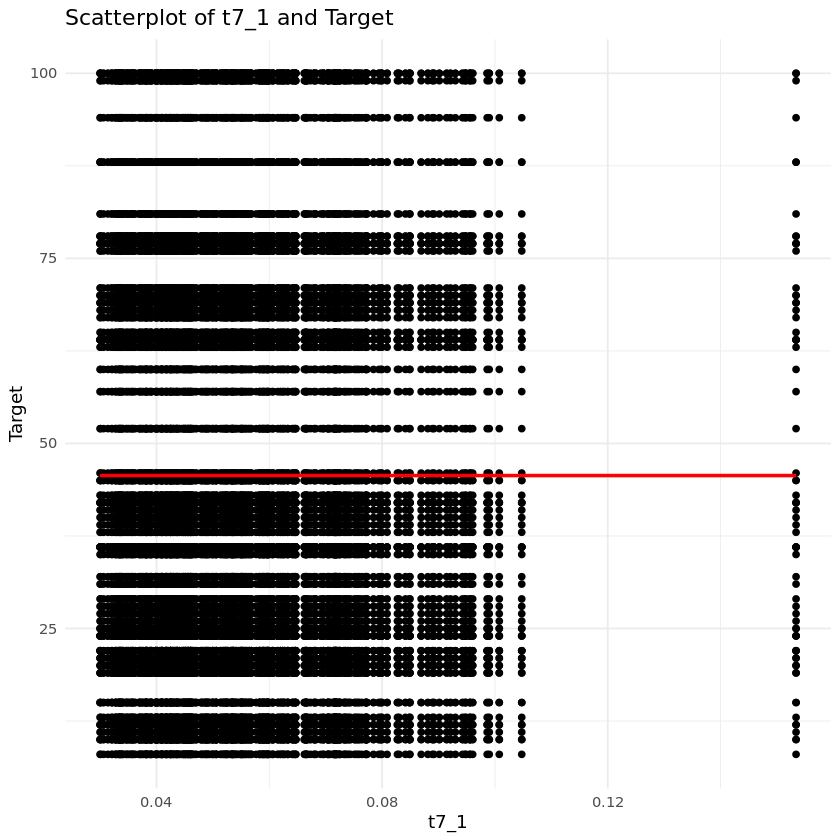

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


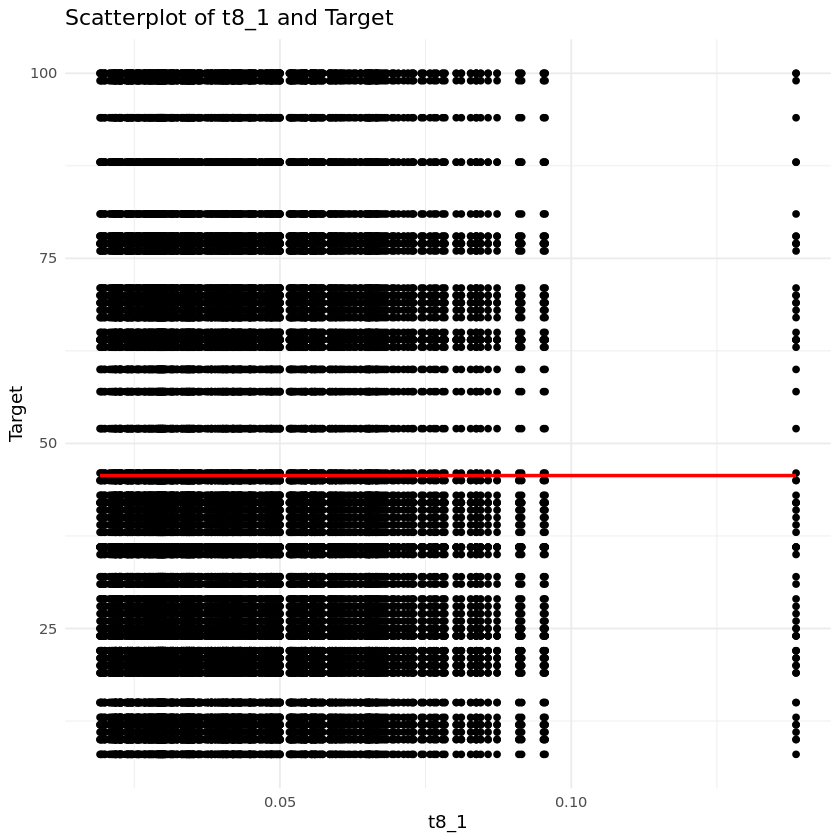

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


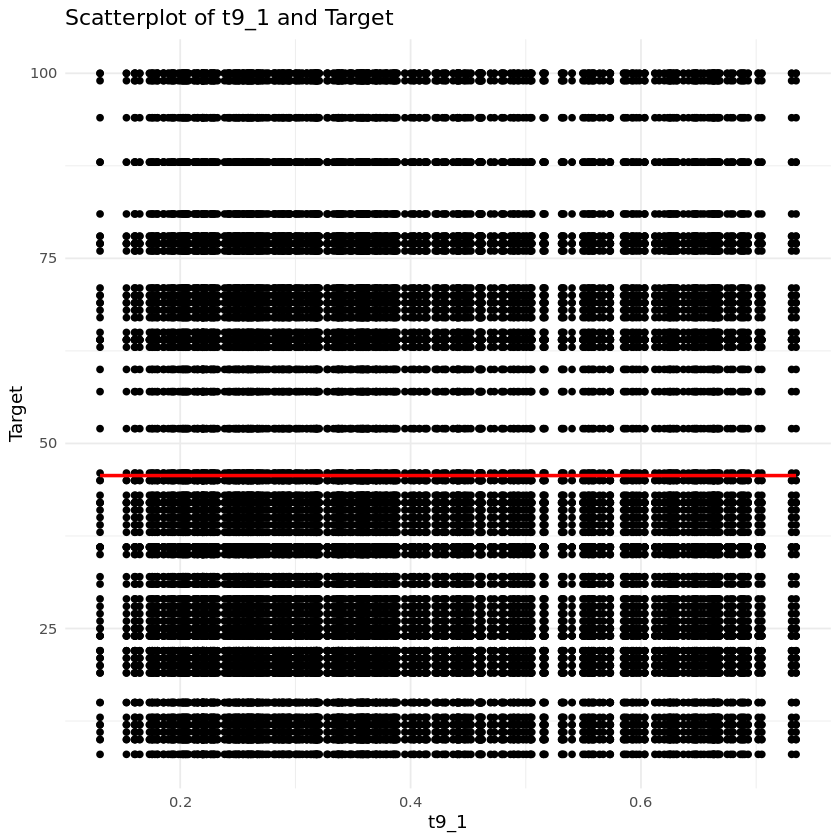

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


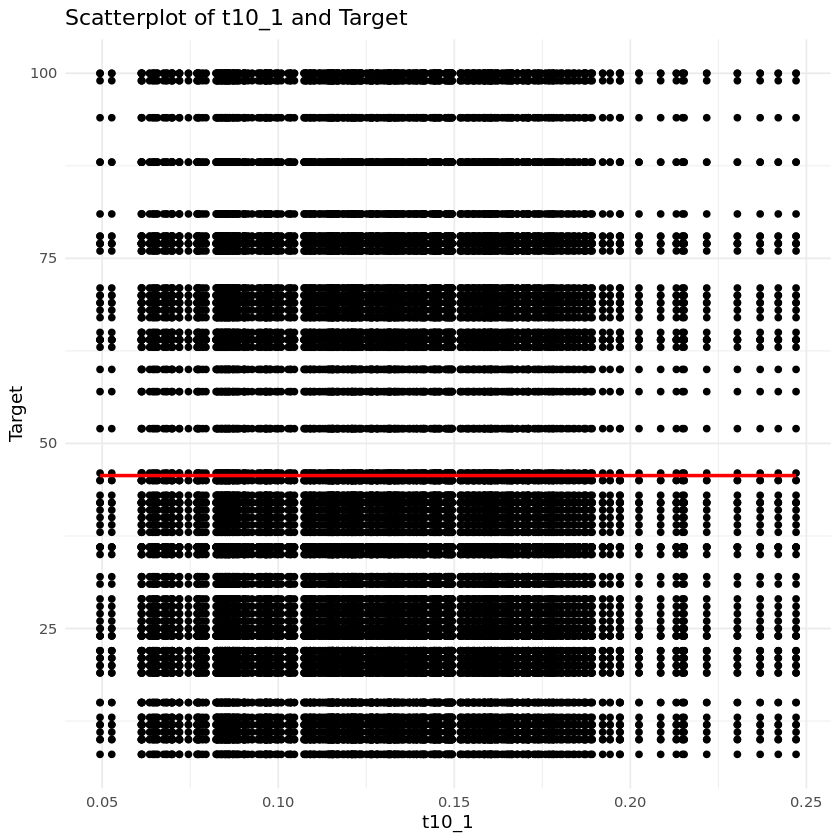

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


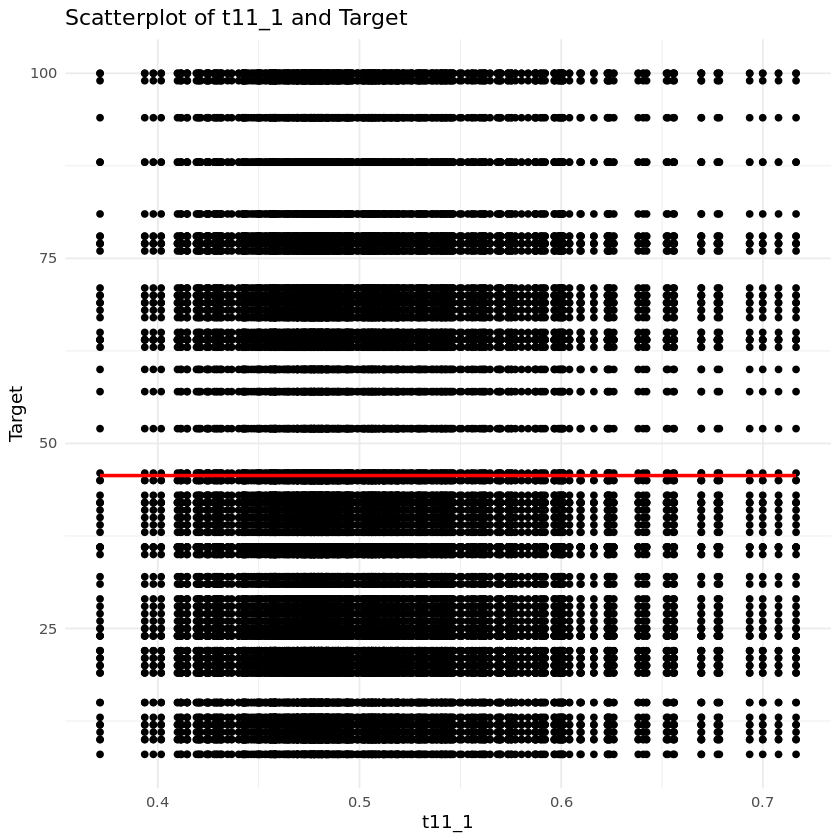

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 572 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 572 rows containing missing values (`geom_point()`).”


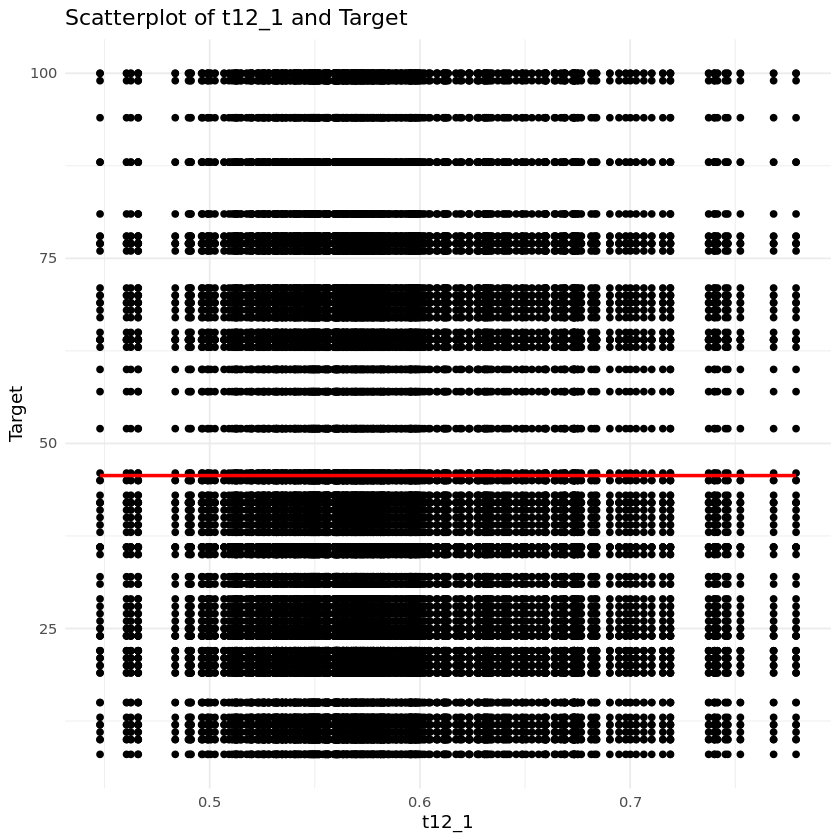

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 868 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 868 rows containing missing values (`geom_point()`).”


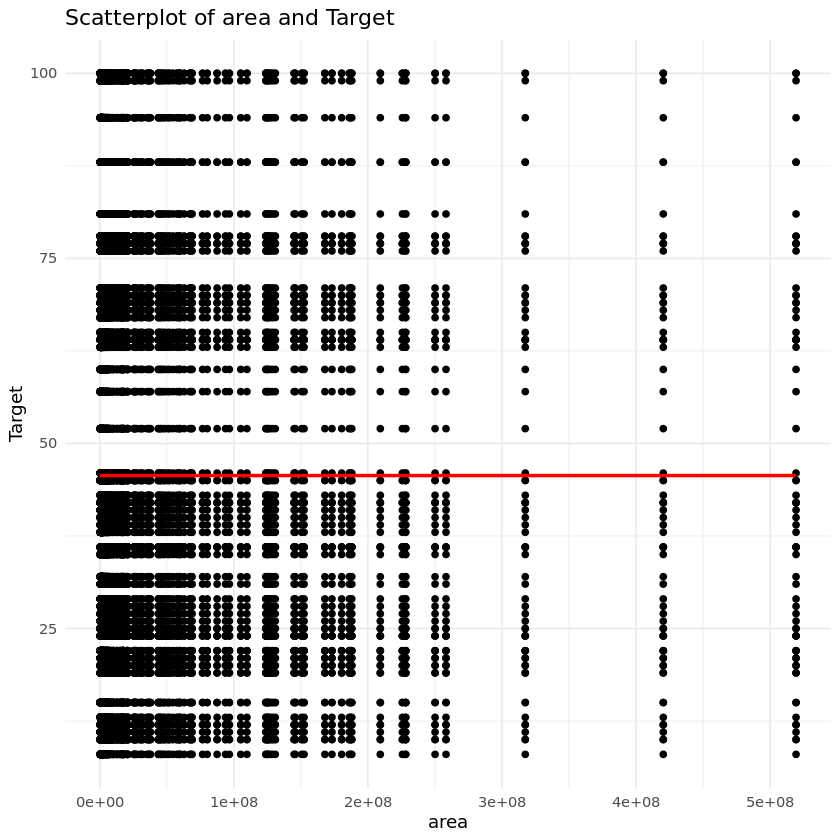

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 572 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 572 rows containing missing values (`geom_point()`).”


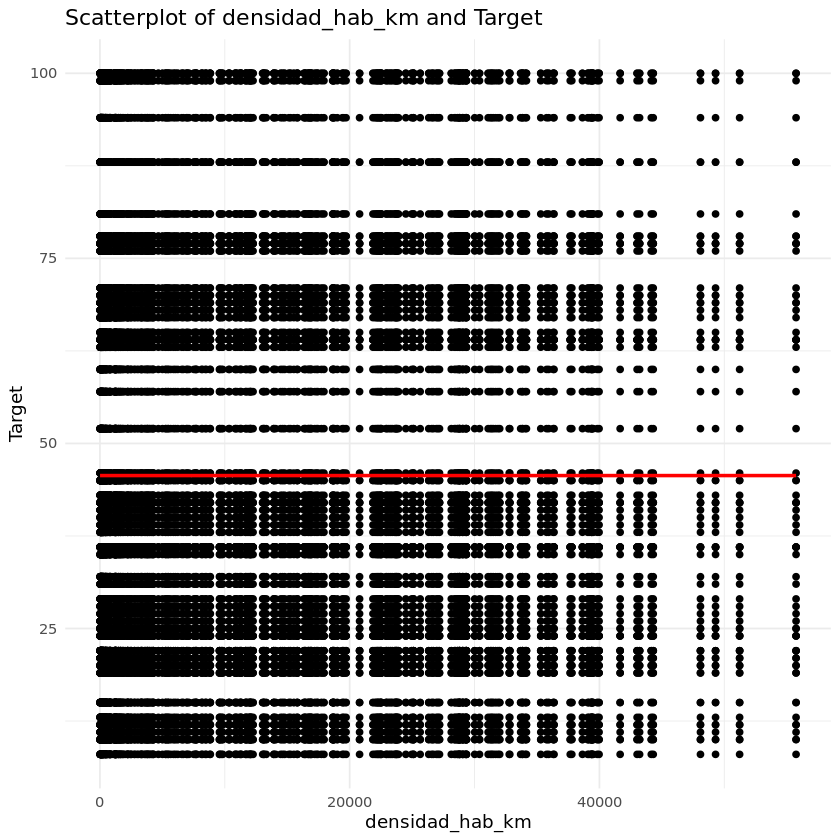

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 572 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 572 rows containing missing values (`geom_point()`).”


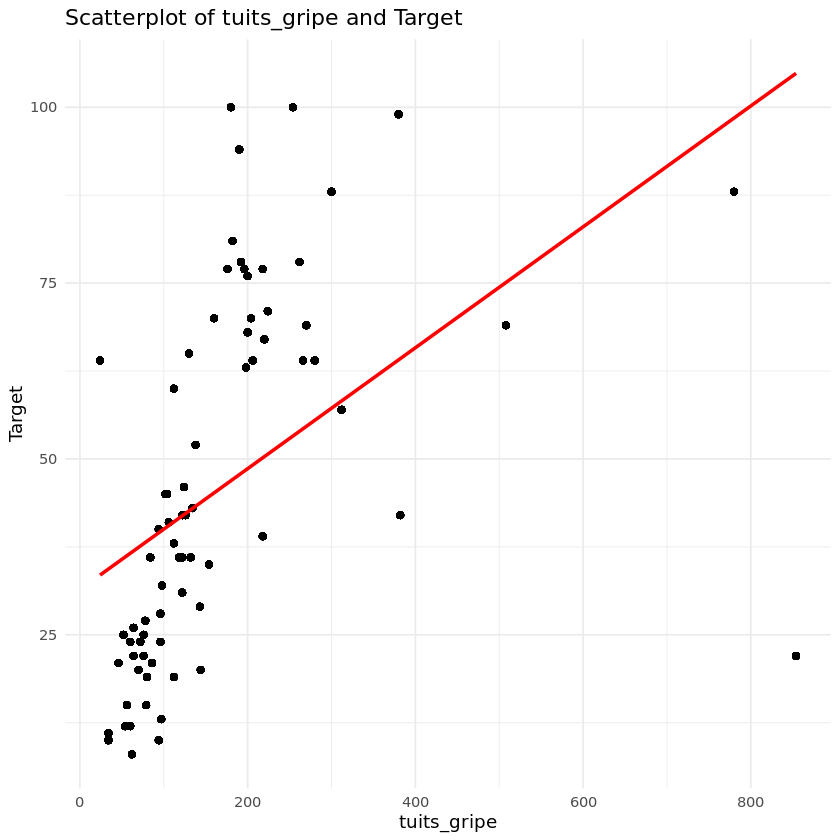

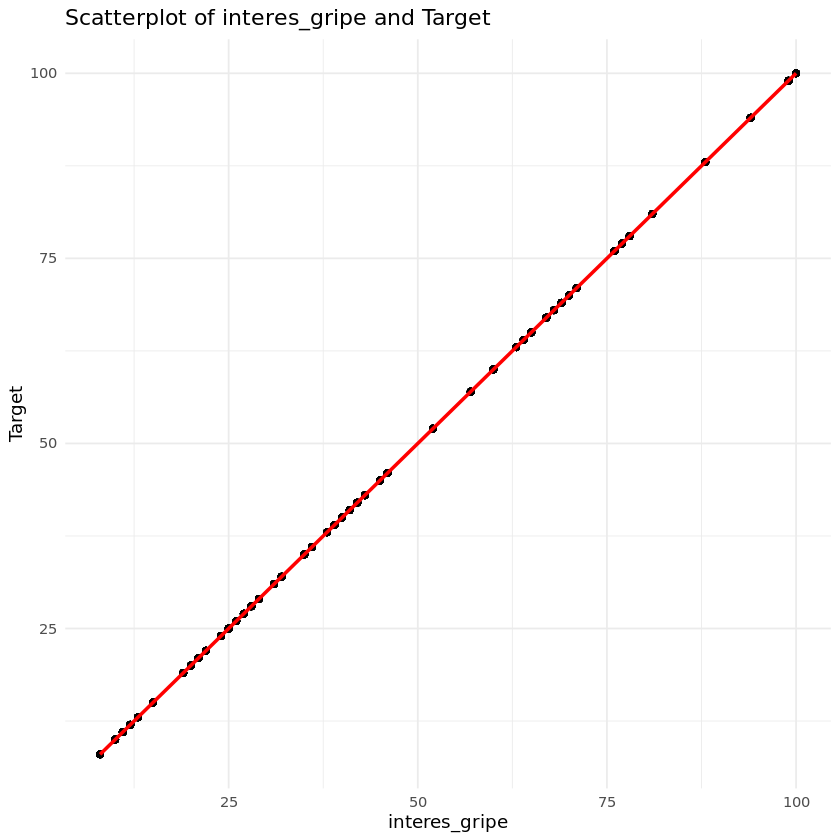

In [21]:
# If not already installed, install the ggplot2 package
if(!require(ggplot2)) install.packages('ggplot2')

# Load the ggplot2 package
library(ggplot2)

# Create scatterplots
for (col in cols) {
  if (is.numeric(data[[col]])) {
    p <- ggplot(data, aes_string(x = col, y = 'Target')) +
      geom_point() +
      geom_smooth(method = "lm", se = FALSE, color = "red") +
      theme_minimal() +
      ggtitle(paste("Scatterplot of", col, "and Target"))
    print(p)
  }
}

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Se ha realizado un análisis causal básico

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos son adecuados para los modelos que se preveen


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>